The shape of the normal dataframe is :  (4045, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10505, 188)
Class :  1.0
The last time value is :  1488.0


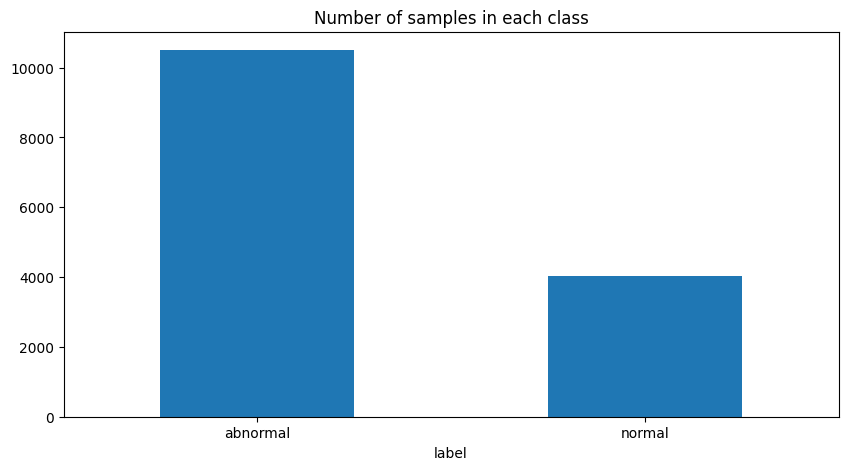

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

normal = pd.read_csv('/ptbdb_normal.csv')
abnormal = pd.read_csv('/ptbdb_abnormal.csv')

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", normal.shape)
# print one example of the last column
print("Class : ", normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", abnormal.shape)
# print one example of the last column
print("Class : ", abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
normal.columns = list(time) + ["label"]
abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

# Concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis=0)

# Check for missing values
if df_ptbd.isnull().sum().sum() > 0:
    df_ptbd = df_ptbd.dropna()

# Split the data into features and labels
X = df_ptbd.drop(columns=["label"])
y = df_ptbd["label"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



The shape of the normal dataframe is :  (4045, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10505, 188)
Class :  1.0
The last time value is :  1488.0


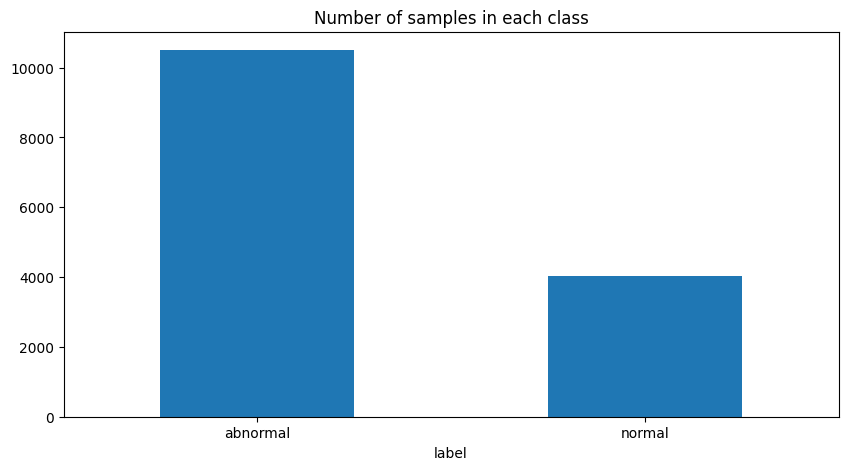

Accuracy: 0.9735
Precision: 0.9733
Recall: 0.9905
F1 Score: 0.9818
Confusion Matrix:
[[ 752   57]
 [  20 2081]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       809
         1.0       0.97      0.99      0.98      2101

    accuracy                           0.97      2910
   macro avg       0.97      0.96      0.97      2910
weighted avg       0.97      0.97      0.97      2910



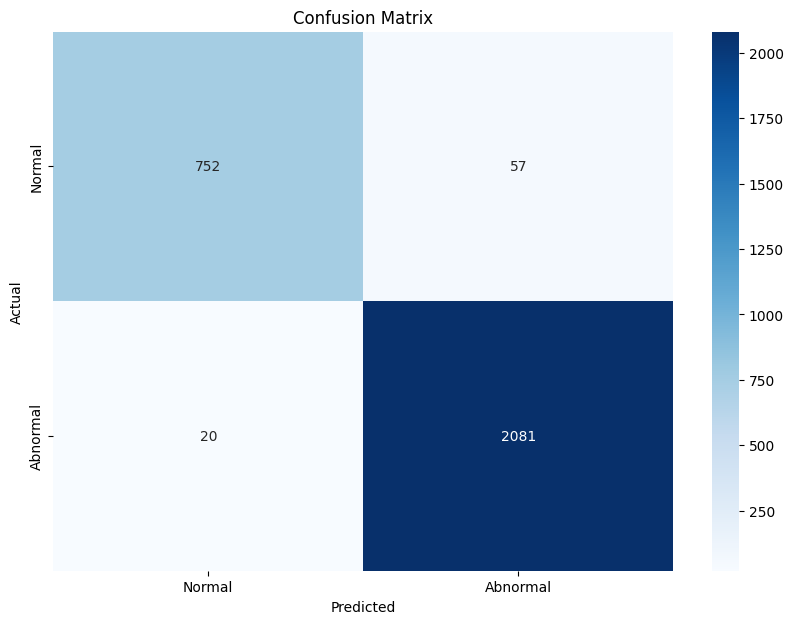

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
)
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

normal = pd.read_csv('/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('/ptbdb_abnormal.csv', header=None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", normal.shape)
# print one example of the last column
print("Class : ", normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", abnormal.shape)
# print one example of the last column
print("Class : ", abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
normal.columns = list(time) + ["label"]
abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

# Concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis=0)

# Check for missing values
if df_ptbd.isnull().sum().sum() > 0:
    df_ptbd = df_ptbd.dropna()

# Split the data into features and labels
X = df_ptbd.drop(columns=["label"])
y = df_ptbd["label"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
rf = RandomForestClassifier(n_estimators=100, max_depth=150)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


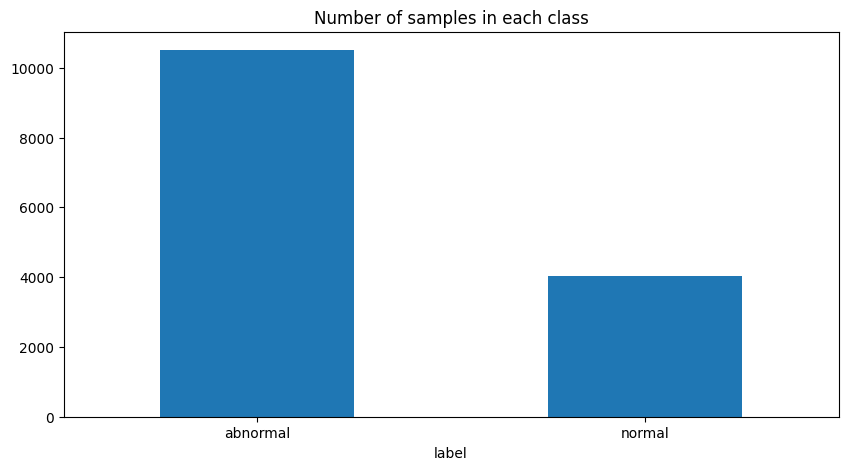

Accuracy: 0.9512
Precision: 0.9757
Recall: 0.9562
F1 Score: 0.9659
Confusion Matrix:
[[ 759   50]
 [  92 2010]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       809
         1.0       0.98      0.96      0.97      2102

    accuracy                           0.95      2911
   macro avg       0.93      0.95      0.94      2911
weighted avg       0.95      0.95      0.95      2911



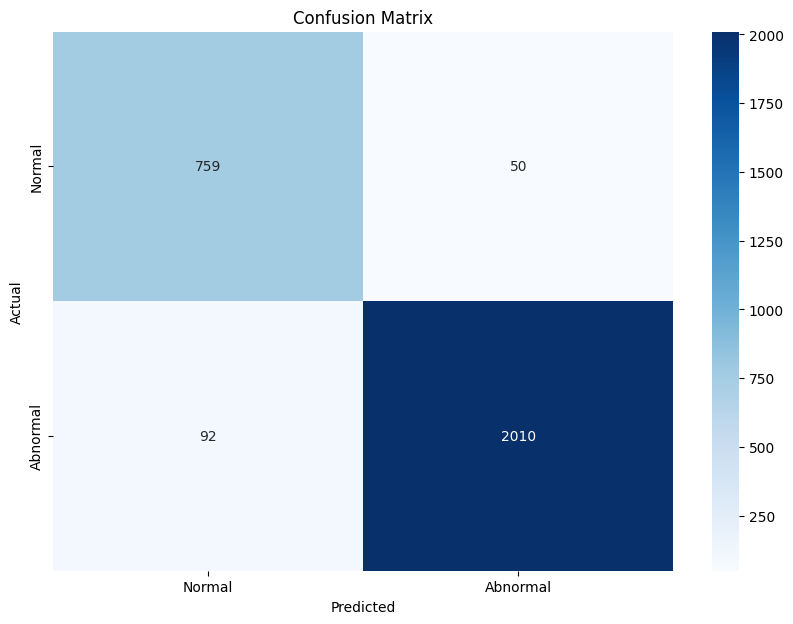

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
)
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

normal = pd.read_csv('/ptbdb_normal.csv', header=None)
abnormal = pd.read_csv('/ptbdb_abnormal.csv', header=None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", normal.shape)
# print one example of the last column
print("Class : ", normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", abnormal.shape)
# print one example of the last column
print("Class : ", abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
normal.columns = list(time) + ["label"]
abnormal.columns = list(time) + ["label"]

# concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis = 0)

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_ptbd["label"].value_counts()
# substitute the class names: 0.0 -> normal, 1.0 -> abnormal
counts.index = counts.index.map(classes_names)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()

# Concatenate the two dataframes
df_ptbd = pd.concat([normal, abnormal], axis=0)

# Check for missing values
if df_ptbd.isnull().sum().sum() > 0:
    df_ptbd = df_ptbd.dropna()

# Split the data into features and labels
X = df_ptbd.drop(columns=["label"])
y = df_ptbd["label"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
